/Users/brettnaul/miniconda3/envs/cesium/lib/python3.5/site-packages/obspy/core/stream.py:656: VisibleDeprecationWarning: converting an array with ndim > 0 to an index will result in an error in the future
  return self.traces.__getitem__(index)


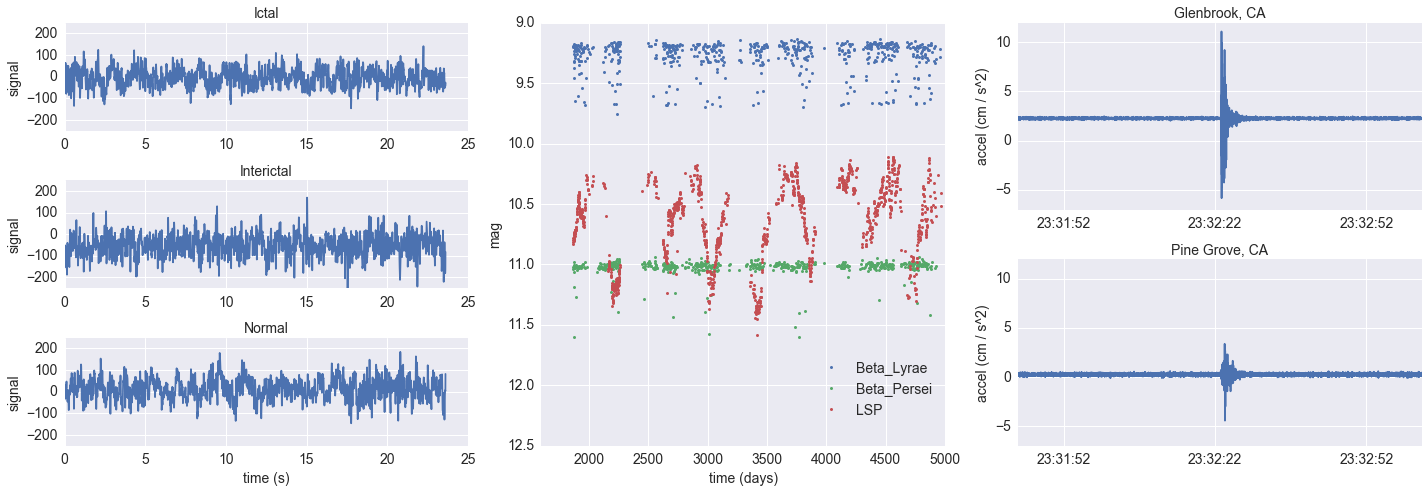

In [15]:
%matplotlib inline
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import seaborn; seaborn.set()

from cesium import datasets

eeg = datasets.fetch_andrzejak()

# Group together classes (Z, O), (N, F), (S) as normal, interictal, ictal
eeg["classes"] = eeg["classes"].astype('U16') #  allocate memory for longer class names
eeg["classes"][np.logical_or(eeg["classes"]=="Z", eeg["classes"]=="O")] = "Normal"
eeg["classes"][np.logical_or(eeg["classes"]=="N", eeg["classes"]=="F")] = "Interictal"
eeg["classes"][eeg["classes"]=="S"] = "Ictal"

#fig, ax = plt.subplots(len(np.unique(eeg["classes"])), 1, sharex=True, sharey=True)

#for label, subplot in zip(np.unique(eeg["classes"]), ax1):
plt.figure(figsize=(20, 7))
#font = {'size': 22}
#matplotlib.rc('font', **font)
fontsize = 14
ticksize = 14

for i, label in enumerate(np.unique(eeg["classes"])):
    ax1 = plt.subplot2grid((6, 3), (2*i, 0), rowspan=2, colspan=1)
#    i = np.where(eeg["classes"] == label)[0][0]
    ax1.plot(eeg["times"][i], eeg["measurements"][i])
    plt.title(label, fontsize=fontsize)
    plt.ylabel('signal', fontsize=fontsize)
    plt.ylim([-250, 250])
    plt.tick_params(axis='both', which='major', labelsize=ticksize)
plt.xlabel('time (s)', fontsize=fontsize)
#plt.savefig('cesium_eeg.png')

from cesium import datasets

asas = datasets.fetch_asas_training()
N = 3
classes = np.unique(asas["classes"])[[1, 2, 9]]
#for label, subplot in zip(classes, ax):
ax2 = plt.subplot2grid((6, 3), (0, 1), rowspan=6, colspan=1)
for label in classes:
    i = np.where(asas["classes"] == label)[0][0]
    ax2.plot(asas["times"][i], asas["measurements"][i], 'o', markersize=3)
    plt.tick_params(axis='both', which='major', labelsize=ticksize)
plt.xlabel('time (days)', fontsize=fontsize)
plt.ylabel('mag', fontsize=fontsize)
plt.xlim([1600, 5000])
plt.ylim([9, 12.5])
plt.gca().invert_yaxis()
plt.legend(classes, bbox_to_anchor=(1.00, 0.23), fontsize=fontsize)
#    subplot.set(xlabel="time (days)", ylabel='mag', title=label)
#plt.savefig('cesium_astro.png')

from obspy import read
st = read("ncedcws-eventdata_2016-04-06T22-00-17.mseed", format='MSEED')
to_use = [('BG', 'JKB', 'DP1'), ('BG', 'MNS', 'DPN')]
titles = ['Glenbrook, CA', 'Pine Grove, CA', 'Castle Rock Springs, CA']
for i in range(len(to_use)):
    ax3 = plt.subplot2grid((6, 3), (3*i, 2), rowspan=3, colspan=1)
    j = np.where([(el.stats.network, el.stats.station, el.stats.channel) == to_use[i] for el in st])[0]
    ax3.plot(st[j].data / 1000.0)
    times = np.array(st[0].stats.starttime) + np.linspace(0, st[0].stats.endtime - st[0].stats.starttime, len(st[0].data))
    inds = np.where([t.microsecond == 0 and t.second in [22, 52] for t in times])[0]
    labels = [t.strftime('%H:%M:%S') for t in times[inds]]
    plt.setp(ax3, xticks=inds, xticklabels=labels)
    plt.ylabel('accel (cm / s^2)', fontsize=fontsize)
    plt.title(titles[i], fontsize=fontsize)
    plt.ylim([-7, 12])
    plt.tick_params(axis='both', which='major', labelsize=ticksize)
plt.tight_layout()

plt.savefig('content/images/cesium_intro.png')

In [ ]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import seaborn; seaborn.set()

from cesium import datasets

asas = datasets.fetch_asas_training()
N = 3
classes = np.unique(asas["classes"])[[1, 2, 9]]
#for label, subplot in zip(classes, ax):
ax2 = plt.subplot2grid((6, 6), (i, 1), rowspan=3, colspan=1)
for label in classes:
    i = np.where(asas["classes"] == label)[0][0]
    ax2.plot(asas["times"][i], asas["measurements"][i], 'o', markersize=3)
plt.xlabel('time (days)')
plt.ylabel('mag')
plt.xlim([1600, 5000])
plt.ylim([9, 12.5])
plt.gca().invert_yaxis()
plt.legend(classes, bbox_to_anchor=(1.00, 0.23))
#    subplot.set(xlabel="time (days)", ylabel='mag', title=label)
plt.savefig('cesium_astro.png')

In [ ]:
from obspy import read
st = read("ncedcws-eventdata_2016-04-06T22-00-17.mseed", format='MSEED')
to_use = [('BG', 'JKB', 'DP1'), ('BG', 'MNS', 'DPN')]
fig, ax = plt.subplots(len(to_use), 1, sharex=True, sharey=True)
titles = ['Glenbrook, CA', 'Pine Grove, CA', 'Castle Rock Springs, CA']
for i, subplot in enumerate(ax):
    j = np.where([(el.stats.network, el.stats.station, el.stats.channel) == to_use[i] for el in st])[0]
    subplot.plot(st[j].data / 1000.0)
    subplot.set(ylabel='accel (cm / s^2)', title=titles[i])
times = np.array(st[0].stats.starttime) + np.linspace(0, st[0].stats.endtime - st[0].stats.starttime, len(st[0].data))
inds = np.where([t.microsecond == 0 and t.second in [22, 52] for t in times])[0]
labels = [t.strftime('%H:%M:%S') for t in times[inds]]
plt.setp(ax, xticks=inds, xticklabels=labels)
plt.savefig('cesium_seismo.png')